In [1]:
## Start from this Cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_excel


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [36]:
dataframe=pd.read_csv('/content/drive/MyDrive/bug detection in source code/balanced_dataset.csv')

In [37]:
dataframe.head()

,Is Error,Unnamed: 1,Code Desc,Is Error.1
0,0,0,/* Taxonomy Classification: 000004000000000000...,0
1,0,1,/* Taxonomy Classification: 000000000002000000...,0
2,0,2,/* Taxonomy Classification: 000000010000006100...,0
3,0,3,/* Taxonomy Classification: 000000010000004300...,0
4,0,4,/* Taxonomy Classification: 000000010000004300...,0


In [39]:
dataframe.describe()

,Is Error,Unnamed: 1,Is Error.1
count,1164.000000,1164.000000,1164.000000
mean,0.500000,290.500000,0.500000
std,0.500215,168.080896,0.500215
min,0.000000,0.000000,0.000000
25%,0.000000,145.000000,0.000000
50%,0.500000,290.500000,0.500000
75%,1.000000,436.000000,1.000000
max,1.000000,581.000000,1.000000


In [40]:
dataframe['Is Error'].value_counts()

0    582
1    582
Name: Is Error, dtype: int64

In [41]:
labels=dataframe["Is Error"].values

In [42]:
features=dataframe["Code Desc"].values

In [43]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

   

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [44]:
processed_features

[' taxonomy classification 0000040000000000000000 write read 0 write which bound 0 upper data type 0 char memory location 0 stack scope 0 same container 4 array of structs pointer 0 no index complexity 0 constant address complexity 0 constant length complexity 0 a address alias 0 none index alias 0 none local control flow 0 none secondary control flow 0 none loop structure 0 no loop complexity 0 a asynchrony 0 no taint 0 no runtime env dependence 0 no magnitude 0 no overflow continuous discrete 0 discrete signedness 0 no copyright 2004 i permission is hereby granted without written agreement or royalty fee to use copy modify and distribute this software and its documentation for any purpose provided that the above copyright notice and the following three paragraphs appear in all copies of this software in no event shall i be liable to any party for direct indirect special incidental or consequential damages arising out of the use of this software and its documentation even if i has bee

In [45]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=200, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
processed_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.47826527,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40633453],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.36753494],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09476564,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

#Random FOREST

In [15]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [16]:
predictions = text_classifier.predict(X_test)

In [17]:
predictions

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[26 84]
 [88 35]]
              precision    recall  f1-score   support

           0       0.23      0.24      0.23       110
           1       0.29      0.28      0.29       123

    accuracy                           0.26       233
   macro avg       0.26      0.26      0.26       233
weighted avg       0.26      0.26      0.26       233

0.26180257510729615


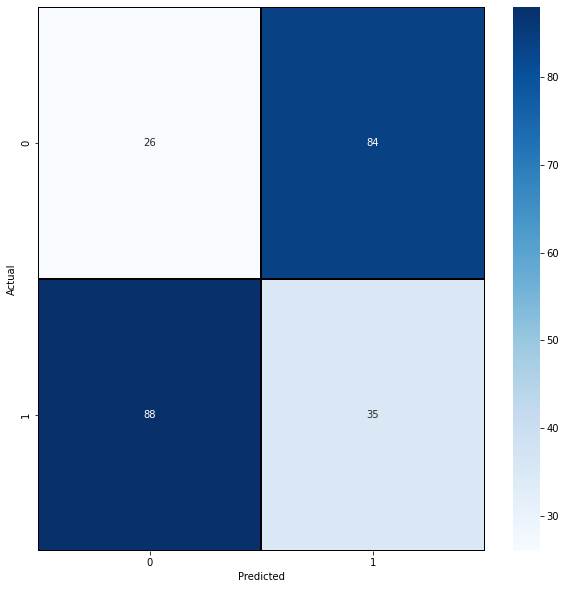

In [19]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
cm = metrics.confusion_matrix(y_test,predictions)
sn.set(font_scale=2.5)

#KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
text_classifier2 = KNeighborsClassifier(n_neighbors = 100)#no of neighbors is hpyer parameter
text_classifier2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [21]:
predictions2 = text_classifier2.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))
print(accuracy_score(y_test, predictions2))

[[68 42]
 [84 39]]
              precision    recall  f1-score   support

           0       0.45      0.62      0.52       110
           1       0.48      0.32      0.38       123

    accuracy                           0.46       233
   macro avg       0.46      0.47      0.45       233
weighted avg       0.47      0.46      0.45       233

0.4592274678111588


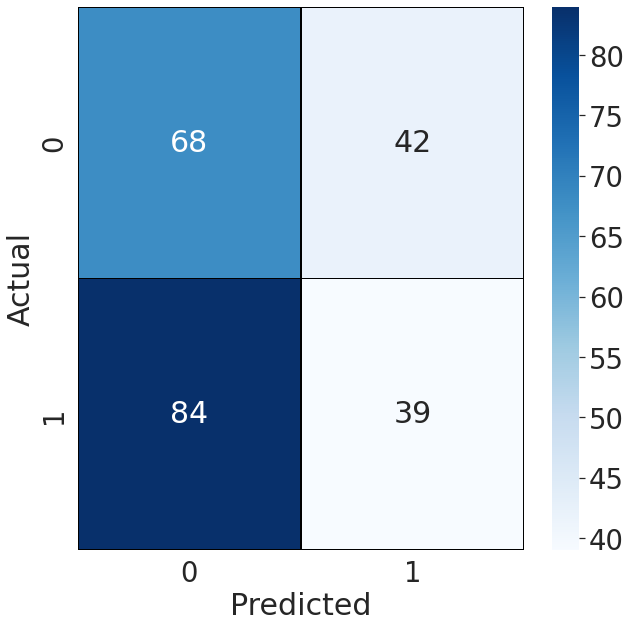

In [23]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions2)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
cm = metrics.confusion_matrix(y_test,predictions2)
sn.set(font_scale=2.5)

# LOGIESTIC RESGGESION

In [24]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
predictions3 = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))
print(accuracy_score(y_test, predictions3))

[[45 65]
 [84 39]]
              precision    recall  f1-score   support

           0       0.35      0.41      0.38       110
           1       0.38      0.32      0.34       123

    accuracy                           0.36       233
   macro avg       0.36      0.36      0.36       233
weighted avg       0.36      0.36      0.36       233

0.3605150214592275


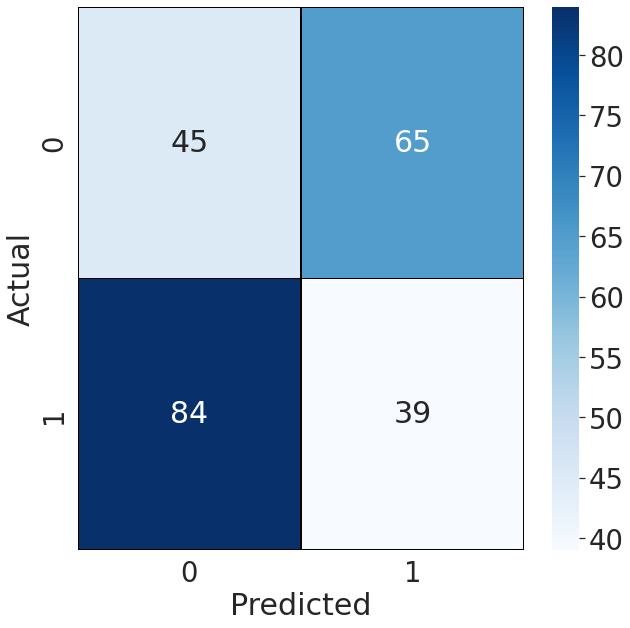

In [28]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions3)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
cm = metrics.confusion_matrix(y_test,predictions3)
sn.set(font_scale=2.5)

#DESSION TREE

In [29]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[40 70]
 [97 26]]
              precision    recall  f1-score   support

           0       0.29      0.36      0.32       110
           1       0.27      0.21      0.24       123

    accuracy                           0.28       233
   macro avg       0.28      0.29      0.28       233
weighted avg       0.28      0.28      0.28       233

0.2832618025751073


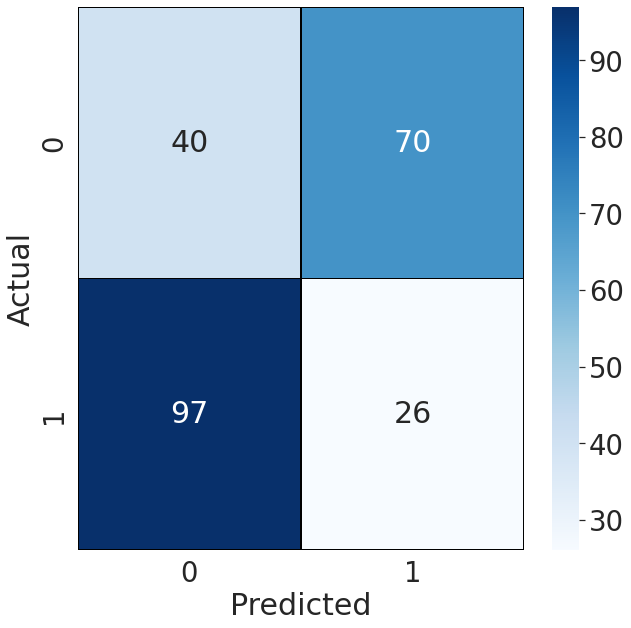

In [31]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
cm = metrics.confusion_matrix(y_test,y_pred)
sn.set(font_scale=2.5)

# svm

In [32]:
from sklearn.svm import SVC

model6 = SVC()
model6.fit(X_train, y_train)

y_pred6 = model6.predict(X_test)

In [33]:
print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))
print(accuracy_score(y_test, y_pred6))

[[44 66]
 [86 37]]
              precision    recall  f1-score   support

           0       0.34      0.40      0.37       110
           1       0.36      0.30      0.33       123

    accuracy                           0.35       233
   macro avg       0.35      0.35      0.35       233
weighted avg       0.35      0.35      0.35       233

0.34763948497854075


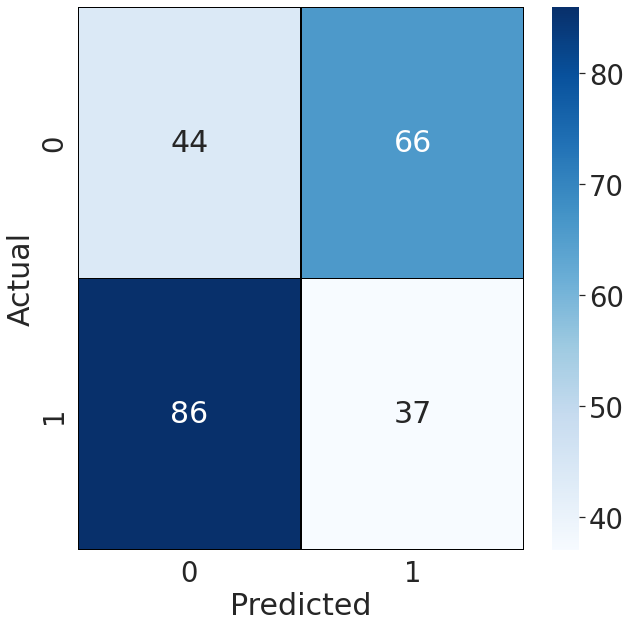

In [34]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred6)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
cm = metrics.confusion_matrix(y_test,y_pred6)
sn.set(font_scale=2.5)